<a href="https://colab.research.google.com/github/jotang31/dumpster/blob/main/Module_2_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

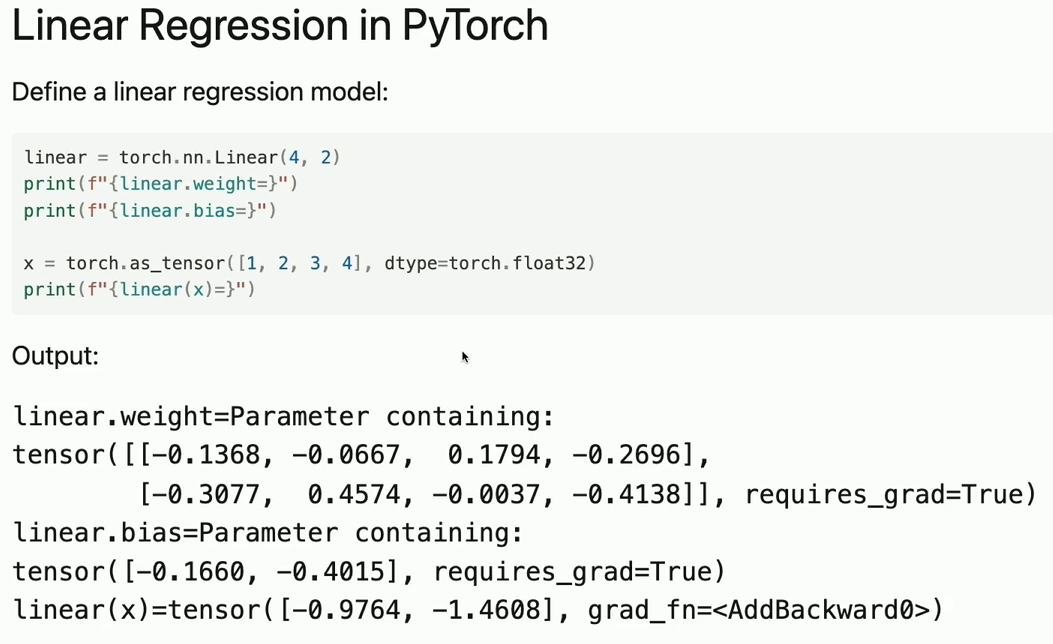

In [3]:
import torch
import torch.nn as nn

# your first deep network, a linear model
model = nn.Linear(10, 1) #everytime you define a linear model, it comes with a different set of random weights
print(model)

# feed torches into your model like it is a functio n
x = torch.ones(10)
model(x)

x = torch.zeros(10)
model(x)

Linear(in_features=10, out_features=1, bias=True)


tensor([0.2434], grad_fn=<ViewBackward0>)

In [11]:
# build a linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = torch.nn.Linear(input_dim, output_dim) # has a fully connect layer inside

    def forward(self, x):
        return nn.functional.sigmoid(self.fc(x)) # in practice you should not put sigmoid in here

model = LinearClassifier(10, 1)
print(model)
#x = torch.ones(1, 10)
x = torch.rand(100, 10)
print(model(x))

LinearClassifier(
  (fc): Linear(in_features=10, out_features=1, bias=True)
)
tensor([[0.6560]], grad_fn=<SigmoidBackward0>)


In [6]:
# softmax in pytorch
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim, n_classes): # n_classes means we have multiple outputs
        super().__init__()
        self.fc = torch.nn.Linear(input_dim, n_classes)

    def forward(self, x):
        return nn.functional.softmax(self.fc(x), dim = -1) # use the softmax function, the last dimension is -1
                                                          # again this is numerically unstable.
                                                          # you should use the softmax function outside when you're training your networks

model = LinearClassifier(10, 4) #let's do a 4 class example
print(model)
# x = torch.ones(1, 10)
x = torch.rand(20, 10)
print(model(x))
print(model(x).sum(dim = -1)) # all the probabilities sum to 1!

LinearClassifier(
  (fc): Linear(in_features=10, out_features=4, bias=True)
)
tensor([[0.1543, 0.1620, 0.3210, 0.3628],
        [0.1621, 0.1563, 0.3121, 0.3695],
        [0.1974, 0.1602, 0.3793, 0.2632],
        [0.1567, 0.1641, 0.3334, 0.3459],
        [0.1223, 0.1877, 0.3646, 0.3254],
        [0.1854, 0.1850, 0.2788, 0.3508],
        [0.1639, 0.1659, 0.3483, 0.3219],
        [0.1579, 0.1523, 0.3444, 0.3455],
        [0.1493, 0.1881, 0.2879, 0.3747],
        [0.1864, 0.1998, 0.2724, 0.3413],
        [0.1379, 0.1946, 0.2838, 0.3837],
        [0.1644, 0.1600, 0.3326, 0.3430],
        [0.1285, 0.2138, 0.2562, 0.4015],
        [0.1089, 0.1921, 0.3962, 0.3028],
        [0.1527, 0.2047, 0.3301, 0.3125],
        [0.1806, 0.1859, 0.3351, 0.2984],
        [0.1604, 0.1758, 0.2978, 0.3660],
        [0.1458, 0.1686, 0.3439, 0.3417],
        [0.1986, 0.1354, 0.3445, 0.3215],
        [0.1158, 0.2067, 0.3036, 0.3740]], grad_fn=<SoftmaxBackward0>)
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.000

# How to get a loss value? Coding up loss functions

In [ ]:
import torch
model = torch.nn.Linear(10, 1)

In [7]:
x = torch.randn(20, 10) # 20 fake inputs
y = torch.randn(20, 1) # 20 fake outputs
# this is our dataset
print(f'{x=} {y=}')

x=tensor([[ 1.6120,  0.9818, -0.7410, -0.4713,  0.2531, -0.3680,  1.0462,  0.5268,
         -0.4841, -1.6461],
        [-1.5806,  0.5791,  0.4058,  1.1746,  0.9745, -0.5685, -0.4405,  0.9145,
          0.0171, -1.3489],
        [ 0.2553,  0.5009,  0.2631, -1.2194,  1.3689, -0.8581, -0.2982,  2.4726,
         -2.6278, -1.6357],
        [ 1.7538, -0.3768, -0.9274,  0.9653,  0.6337,  0.0557, -0.9083,  2.1567,
         -0.1271,  0.4228],
        [ 0.4439,  1.3819, -1.5231,  0.4911, -0.7735, -1.6022,  1.6779, -0.9900,
         -0.1032, -1.2184],
        [ 0.1202, -1.2019,  0.7590,  0.5207,  1.2258,  0.0779,  0.4053,  1.6396,
          0.7399,  0.8015],
        [-0.2554,  1.2975,  0.5269, -0.4736, -0.7962,  0.2530, -2.9444, -1.2258,
         -0.7553, -0.2387],
        [ 0.4425,  1.8053,  1.2277,  0.6525, -0.4965,  1.0893,  0.4395,  0.2240,
          1.0711,  0.8213],
        [-0.9517, -1.8941,  0.3364, -1.0562,  2.6555, -1.6589,  0.6623,  0.2220,
         -0.1589,  1.0456],
        [ 1.2213,

In [21]:
pred_y = model(x)
print(pred_y)

tensor([[0.1583, 0.3824, 0.0721, 0.3872],
        [0.4362, 0.1086, 0.1422, 0.3130],
        [0.2264, 0.3617, 0.0318, 0.3800],
        [0.0895, 0.2408, 0.2104, 0.4593],
        [0.2537, 0.2200, 0.0758, 0.4505],
        [0.1785, 0.1236, 0.4257, 0.2722],
        [0.2427, 0.2224, 0.2427, 0.2922],
        [0.1046, 0.1721, 0.3850, 0.3382],
        [0.4425, 0.0615, 0.3056, 0.1904],
        [0.1147, 0.2697, 0.3223, 0.2933],
        [0.3590, 0.0967, 0.1998, 0.3445],
        [0.1965, 0.2083, 0.1720, 0.4231],
        [0.2050, 0.1651, 0.2504, 0.3794],
        [0.2256, 0.3711, 0.0613, 0.3420],
        [0.1041, 0.0529, 0.6276, 0.2154],
        [0.2302, 0.3236, 0.0871, 0.3591],
        [0.1435, 0.1580, 0.3467, 0.3519],
        [0.2917, 0.1308, 0.3858, 0.1916],
        [0.2508, 0.1548, 0.4205, 0.1739],
        [0.3585, 0.1202, 0.2781, 0.2432]], grad_fn=<SoftmaxBackward0>)


In [22]:
# Compare y and pred_y
loss = torch.nn.functional.mse_loss(pred_y, y)
print(loss)

tensor(0.2519, grad_fn=<MseLossBackward0>)


<ipython-input-22-519ec38c362f>:2: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(pred_y, y)


In [23]:
# we can also do this ourself
def mse_loss(pred_y, y):
  return torch.mean((pred_y - y)**2)

# same result
mse_loss(pred_y, y)


tensor(0.2519, grad_fn=<MeanBackward0>)

In [27]:
# Now if we're dealing with classification
y = (torch.randn(20, 1) > 0).float() # make the labels 0 or 1
print(f'{y=}')

'''
pred_y = (pred_y > 0).float()
print(f'{pred_y=}')
'''

y=tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


"\npred_y = (pred_y > 0).float()\nprint(f'{pred_y=}')\n"

In [28]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(pred_y, y) # this is take care of sigmoid for you, no need to add it yourself
print(loss)

ValueError: Target size (torch.Size([20, 1])) must be the same as input size (torch.Size([20, 4]))

In [30]:
# For multi-class classification

n_classes = 3
model = torch.nn.Linear(10, n_classes) # MAKE SURE YOU JUST USE THE LINEAR MODEL
# the labels now will be 0, 1, or 2 (vs just 0 and 1)

y = (torch.randn(20) > 0).long() + (torch.randn(20) > 0).long()
# make the labels 0, 1, 2
# make sure you do long() because that's what it expects for labels


In [32]:
pred_y = model(x)
loss = torch.nn.functional.cross_entropy(pred_y, y) # USE THE BUILT IN LOSS FUNCTION, NO DOING SOFTMAX/SIGMOID YOURSELF
print(loss)

tensor(1.2429, grad_fn=<NllLossBackward0>)


# Back propogation

In [ ]:
a = torch.rand(100, requires_grad = True)
# requires_grad - this builds up the computational graph for you in the background!!

b = 0.5 + (a**2).sum()
b.backward() # this runs backpropogation - populates Tensor.grad for any tensor where requires_grad = True
a.grad

# How Pytorch constructs computational graphs

In [1]:
import torch

In [16]:
y = torch.rand(10)
x = torch.rand(10, requires_grad = True)
x

tensor([0.9854, 0.2786, 0.0414, 0.7092, 0.4577, 0.3907, 0.3470, 0.7486, 0.3332,
        0.6629], requires_grad=True)

In [5]:
print((x**2).mean())  # the grad function is attached to your tensor (allows you to compute gradients)
print((y**2).mean())

tensor(0.4035, grad_fn=<MeanBackward0>)
tensor(0.3353)


In [17]:
b = (x**2).mean()
b.backward()      # this function ran backpropogation through the mean function and then through the square function and then populated x.grad
                  # computes the gradient of the scalar b
                  # you cannot call backward() twice. You have to redefine b then call it again.

print(x.grad)     # if you call x.grad again it will sum up the previous gradients calculated. We will address this later
print(x / 10 * 2) # same thing as doing gradient by hand!


tensor([0.1971, 0.0557, 0.0083, 0.1418, 0.0915, 0.0781, 0.0694, 0.1497, 0.0666,
        0.1326])
tensor([0.1971, 0.0557, 0.0083, 0.1418, 0.0915, 0.0781, 0.0694, 0.1497, 0.0666,
        0.1326], grad_fn=<MulBackward0>)


In [18]:
# see the memory used for requires_grad = True
torch.cuda.memory_allocated()

0

In [20]:
x = torch.rand(2**20, requires_grad=True, device='cuda')
torch.cuda.memory_allocated() / 1024 / 1024

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [21]:
b = torch.relu(x)
torch.cuda.memory_allocated() / 1024 / 1024

0.0

In [ ]:
b = x
for _ in range(100):
  b = torch.relu(b)
torch.cuda.memory_allocated() / 1024 / 1024

In [ ]:
b.sum().backward()
torch.cuda.memory_allocated() / 1024 / 1024 # you call backward() on a scalar and it collapses the whole computational graph
                                            # Python agressively takes back memory

# Linear Regression

100%|██████████| 345M/345M [00:34<00:00, 10.1MB/s]


Extracting flowers/flowers-102/102flowers.tgz to flowers/flowers-102


100%|██████████| 502/502 [00:00<00:00, 651kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 18.3MB/s]


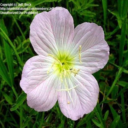

In [1]:
# start with our flower dataset
import torchvision
import torch
from PIL import Image

size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102(root = './flowers', split = 'train', download = True, transform = transform))
test_dataset = list(torchvision.datasets.Flowers102(root = './flowers', split = 'test', download = True, transform = transform))

def visualize_image(img: torch.Tensor) -> Image.Image:
  return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_dataset[1][0])

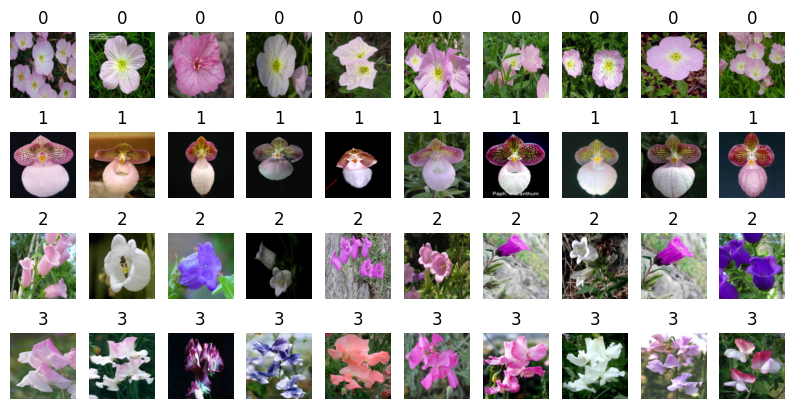

In [2]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10, figsize=(10,5))
for i, (im, l) in enumerate(list(train_dataset)[:40]):
  ax[i//10, i%10].imshow(visualize_image(im))
  ax[i//10, i%10].set_title(l)
  ax[i//10, i%10].axis('off')

In [29]:
print(type(train_dataset[0][0]))  # first picture - type of the first element is the tensor that hold the image data
print(type(train_dataset[0][1]))  # first picture - type of the second element is the label, an int
print(train_dataset[0][0].shape)  # 3 is the # of channels (RGB), 128 by 128 is the size of the image

<class 'torch.Tensor'>
<class 'int'>
torch.Size([3, 128, 128])


In [3]:
# concatenate all images into one giant tensor - so we can do gradient descent
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
#train_images.shape  # 1020 images
train_label = torch.tensor([label for _, label in train_dataset])


In [4]:
train_images_01 = train_images[train_label <= 1]  # we just want to train on labels 0 and 1
train_label_01 = train_label[train_label <= 1]


# now we need a model
model = torch.nn.Linear(128 * 128 * 3, 1)

# we also need a loss function
loss = torch.nn.MSELoss()

# need an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001, momentum=0)  # you can change the learning rate lr

# now let's train for a few epochs
for epoch in range(10):
  # Compute model predictions
  pred_label = model(train_images_01.view(-1, 128 * 128 * 3))

  # Compute loss
  loss_val = loss(pred_label.view(-1), train_label_01.float())

  # Compute gradients and step the optimizer
  optimizer.zero_grad()   # reset all the gradient values to zero so you don't accumulate. backward() will add to it.
  loss_val.backward()
  optimizer.step()        # takes one step in gradient descent
  print(f"Epoch {epoch}: loss={loss_val.item()}")

Epoch 0: loss=0.4281197488307953
Epoch 1: loss=0.34526950120925903
Epoch 2: loss=0.2880287766456604
Epoch 3: loss=0.2459891140460968
Epoch 4: loss=0.21377894282341003
Epoch 5: loss=0.1884007304906845
Epoch 6: loss=0.16802985966205597
Epoch 7: loss=0.1514616757631302
Epoch 8: loss=0.1378466784954071
Epoch 9: loss=0.12655773758888245


In [33]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0)
test_label = torch.tensor([label for _, label in test_dataset])

In [35]:
test_images_01 = test_images[test_label <= 1]  # we just want to test on labels 0 and 1
test_label_01 = test_label[test_label <= 1]
pred_label = model(test_images_01.view(-1, 128 * 128 * 3))
print(loss(pred_label.view(-1), test_label_01.float()).item())

0.2895317077636719


# Binary Logistic Regression

In [36]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
train_label = torch.tensor([label for _, label in train_dataset])

In [39]:
train_images_01 = train_images[train_label <= 1]  # we just want to train on labels 0 and 1
train_label_01 = train_label[train_label <= 1]

model = torch.nn.Linear(128 * 128 * 3, 1)   # 1 for one output
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0)

for epoch in range(100):
  # Compute the model output
  out = model(train_images_01.view(-1, 3 * 128 * 128))

  # Compute the loss
  loss_val = loss(out.squeeze(), train_label_01.float())

  # Compute gradient and update weights
  optimizer.zero_grad()
  loss_val.backward()
  optimizer.step()
  print(f"{epoch=} {loss_val.item()=}")

epoch=0 loss_val.item()=0.6886889934539795
epoch=1 loss_val.item()=0.5993276834487915
epoch=2 loss_val.item()=0.5311099886894226
epoch=3 loss_val.item()=0.4781436026096344
epoch=4 loss_val.item()=0.4361855089664459
epoch=5 loss_val.item()=0.4022281765937805
epoch=6 loss_val.item()=0.3742066025733948
epoch=7 loss_val.item()=0.35066503286361694
epoch=8 loss_val.item()=0.33057287335395813
epoch=9 loss_val.item()=0.3131825923919678
epoch=10 loss_val.item()=0.2979465126991272
epoch=11 loss_val.item()=0.2844555974006653
epoch=12 loss_val.item()=0.2723996937274933
epoch=13 loss_val.item()=0.2615392208099365
epoch=14 loss_val.item()=0.25168687105178833
epoch=15 loss_val.item()=0.24269326031208038
epoch=16 loss_val.item()=0.23443838953971863
epoch=17 loss_val.item()=0.22682437300682068
epoch=18 loss_val.item()=0.21977078914642334
epoch=19 loss_val.item()=0.2132105827331543
epoch=20 loss_val.item()=0.20708778500556946
epoch=21 loss_val.item()=0.20135481655597687
epoch=22 loss_val.item()=0.195971

In [41]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0)
test_label = torch.tensor([label for _, label in test_dataset])

In [42]:
test_images_01 = test_images[test_label <= 1]  # we just want to test on labels 0 and 1
test_label_01 = test_label[test_label <= 1]

pred_test = model(test_images_01.view(-1, 128 * 128 * 3))
print(((pred_test[:, 0] > 0).int() == test_label_01).float().mean())

# predicts correctly 78% of the time!

tensor(0.7833)


# Multi-class Logistic Regression

In [ ]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
train_label = torch.tensor([label for _, label in train_dataset])

In [5]:
model = torch.nn.Linear(128 * 128 * 3, 102)   # we output 102 values, one for each class we want to classify

#train_images, train_label = train_images.cuda(), train_label.cuda()
#model.cuda()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0)

for epoch in range(1000):
  # Compute the model output
  out = model(train_images.view(-1, 3 * 128 * 128))
  # print(out.shape)    # 1020 predictions, each of which has 102 values, one for each flower in the dataset
  # break

  # Compute the loss
  loss_val = loss(out, train_label)

  # Compute gradient and update weights
  optimizer.zero_grad()
  loss_val.backward()
  optimizer.step()
  if epoch % 10 == 0:
    print(f"{epoch=} {loss_val.item()=}")

epoch=0 loss_val.item()=4.656985759735107
epoch=10 loss_val.item()=4.135555267333984
epoch=20 loss_val.item()=3.751417875289917
epoch=30 loss_val.item()=3.4355015754699707
epoch=40 loss_val.item()=3.1664226055145264
epoch=50 loss_val.item()=2.931835889816284
epoch=60 loss_val.item()=2.7242212295532227
epoch=70 loss_val.item()=2.538606882095337
epoch=80 loss_val.item()=2.3714439868927
epoch=90 loss_val.item()=2.220050573348999
epoch=100 loss_val.item()=2.082313299179077
epoch=110 loss_val.item()=1.9565201997756958
epoch=120 loss_val.item()=1.8412585258483887
epoch=130 loss_val.item()=1.735344648361206
epoch=140 loss_val.item()=1.6377769708633423
epoch=150 loss_val.item()=1.547698736190796
epoch=160 loss_val.item()=1.4643714427947998
epoch=170 loss_val.item()=1.3871527910232544
epoch=180 loss_val.item()=1.3154808282852173
epoch=190 loss_val.item()=1.2488597631454468
epoch=200 loss_val.item()=1.186850666999817
epoch=210 loss_val.item()=1.1290614604949951
epoch=220 loss_val.item()=1.075141

In [48]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0)
test_label = torch.tensor([label for _, label in test_dataset])

In [50]:
#test_images, test_label = test_images.cuda(), test_label.cuda()

pred_test = model(test_images.view(-1, 128 * 128 * 3))
print(((pred_test.argmax(dim=1) == test_label).float().mean()))

# randonm chance is about 1% accuracy. here we're 15x better than random chance.

tensor(0.1516)


# Stochastic Gradient Descent

In [10]:
model = torch.nn.Linear(128 * 128 * 3, 102)   # we output 102 values, one for each class we want to classify

batch_size = 32

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0002, momentum=0.9)

for epoch in range(10):
  avg_loss = []
  for i in range(0, len(train_images), batch_size):
    # Compute the model output over all our training images
    out = model(train_images[i, i + batch_size].view(-1, 128*128*3))

    # Compute the loss over all our training images
    optimizer.zero_grad()
    loss_val = loss(out, train_label[i, i + batch_size])

    # Compute gradient and update weights
    loss_val.backward()
    optimizer.step()
    avg_loss.append(float(loss_val))
  print(f"Epoch {epoch=}, Loss {sum(avg_loss) / len(avg_loss)}")


IndexError: index 32 is out of bounds for dimension 1 with size 3

# Train a Deep Network from Scratch

In [14]:
import torchvision
import torch
from PIL import Image

size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102(root = './flowers', split = 'train', download = True, transform = transform)
test_dataset = torchvision.datasets.Flowers102(root = './flowers', split = 'test', download = True, transform = transform)


In [15]:
train_dataset.__len__()
train_dataset.__getitem__(0)
# OR
len(train_dataset)
train_dataset[0]


(tensor([[[0.0471, 0.0706, 0.0745,  ..., 0.1255, 0.4667, 0.5647],
          [0.0667, 0.0667, 0.0549,  ..., 0.1333, 0.4824, 0.5647],
          [0.0824, 0.0745, 0.0549,  ..., 0.1451, 0.5059, 0.5686],
          ...,
          [0.1059, 0.1059, 0.0863,  ..., 0.5020, 0.4902, 0.4706],
          [0.1137, 0.1137, 0.1294,  ..., 0.5059, 0.4784, 0.4706],
          [0.1020, 0.1176, 0.1176,  ..., 0.5020, 0.4745, 0.4667]],
 
         [[0.0863, 0.1255, 0.1373,  ..., 0.1294, 0.3412, 0.3961],
          [0.0941, 0.1098, 0.1059,  ..., 0.1294, 0.3490, 0.3922],
          [0.0941, 0.0941, 0.0824,  ..., 0.1294, 0.3608, 0.3843],
          ...,
          [0.2000, 0.1804, 0.1333,  ..., 0.4235, 0.4118, 0.3922],
          [0.2118, 0.2039, 0.2000,  ..., 0.4275, 0.4039, 0.3922],
          [0.2078, 0.2196, 0.2196,  ..., 0.4196, 0.4078, 0.3765]],
 
         [[0.0314, 0.0392, 0.0353,  ..., 0.0863, 0.4745, 0.5961],
          [0.0392, 0.0353, 0.0235,  ..., 0.0980, 0.4902, 0.5922],
          [0.0431, 0.0353, 0.0235,  ...,

In [22]:
class MyModel(torch.nn.Module):
  def __init__(self, layer_size = [512, 512, 512]) -> None:
    super(MyModel, self).__init__()
    layers = []
    layers.append(torch.nn.Flatten())
    c = 128*128*3
    for s in layer_size:
      layers.append(torch.nn.Linear(c, s))
      layers.append(torch.nn.ReLU())
      c = s
    layers.append(torch.nn.Linear(c, 102))
    self.model = torch.nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

model = MyModel()

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)

for epoch in range(10):
  for imgs, labels in train_loader:
    pred = model(imgs)

    loss_val = loss_fn(pred, labels)

    optimizer.zero_grad() # resetting the gradient
    loss_val.backward()
    optimizer.step()
    print(loss_val.item())

4.625202178955078
4.6252031326293945
4.624260425567627
4.624057292938232
4.621197700500488
4.623133659362793
4.625531196594238
4.632842063903809
4.631274223327637
4.630086898803711
4.63077449798584
4.632209777832031
4.636144638061523
4.625164031982422
4.635906219482422
4.638440132141113
4.616150856018066
4.619978904724121
4.610904216766357
4.616367340087891
4.622332572937012
4.61163330078125
4.604153633117676
4.609477519989014
4.616955757141113
4.623476982116699
4.601501941680908
4.623534679412842
4.631099224090576
4.627145767211914
4.628942489624023
4.6195855140686035
4.587831974029541
4.589676856994629
4.589657306671143
4.586681842803955
4.601924896240234
4.586151123046875
4.601724624633789
4.600681304931641
4.5814528465271
4.5788702964782715
4.5800371170043945
4.59808349609375
4.5939788818359375
4.5682454109191895
4.582741737365723
4.563824653625488
4.5527191162109375
4.5705389976501465
4.533853530883789
4.532353401184082
4.541616916656494
4.521546363830566
4.538263320922852
4.54971

# *Activation* *Functions* - making layers!!! cool

In [ ]:
import torch

In [23]:
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__() # for Python to do proper bookkepping - always do this
    self.fc1 = torch.nn.Linear(1, 10)
    self.fc2 = torch.nn.Linear(10, 1)
    self.act = torch.nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.fc1(x) #linear
    x = self.act(x) # relu
    x = self.fc2(x) #linear
    return x

net = Net()
net(torch.tensor([1.0]))

tensor([0.5331], grad_fn=<ViewBackward0>)

# Normalizations in Pytorch

In [24]:
class MyModel(torch.nn.Module):
  def __init__(self, layer_size = [512, 512, 512]) -> None: # this is a 4 layr network if you count the output layer in the end
    super().__init__()
    layers = []
    layers.append(torch.nn.Flatten())
    c = 128*128*3
    for s in layer_size:
      layers.append(torch.nn.Linear(c, s))
      layers.append(torch.nn.ReLU())
      c = s
    layers.append(torch.nn.Linear(c, 102)) # "add one linear layer as a classifier in the end"
    self.model = torch.nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)

net = MyModel()
x = torch.randn(10, 3, 128, 128)
net(x)

tensor([[ 0.0063, -0.0280, -0.0007,  ..., -0.0045, -0.0207, -0.0012],
        [ 0.0096, -0.0175,  0.0023,  ..., -0.0137, -0.0122,  0.0473],
        [ 0.0417, -0.1031,  0.0157,  ..., -0.0295, -0.0574,  0.0054],
        ...,
        [-0.0121, -0.0349, -0.0269,  ..., -0.0438, -0.0112,  0.0075],
        [ 0.0315, -0.0954, -0.0166,  ...,  0.0442, -0.0816, -0.0093],
        [ 0.0142, -0.0192,  0.0287,  ..., -0.0064, -0.0558,  0.0153]],
       grad_fn=<AddmmBackward0>)

In [26]:
x = torch.randn(10, 3, 128, 128)

# a 1 layer network
net0 = MyModel([])
print(f"{net0(x).norm()=}")
# a 2 layer network
net1 = MyModel([512])
print(f"{net1(x).norm()=}")
# a 3 layer network
net2 = MyModel([512, 512])
print(f"{net2(x).norm()=}")

# the outputs get slightly smaller


net0(x).norm()=tensor(19.3253, grad_fn=<LinalgVectorNormBackward0>)
net1(x).norm()=tensor(7.4696, grad_fn=<LinalgVectorNormBackward0>)
net2(x).norm()=tensor(3.0265, grad_fn=<LinalgVectorNormBackward0>)


In [28]:
for n in range(10):
  netn = MyModel([512] * n)
  print(f"{n=} {netn(x).norm()=}")

n=0 netn(x).norm()=tensor(18.7831, grad_fn=<LinalgVectorNormBackward0>)
n=1 netn(x).norm()=tensor(7.4265, grad_fn=<LinalgVectorNormBackward0>)
n=2 netn(x).norm()=tensor(3.2800, grad_fn=<LinalgVectorNormBackward0>)
n=3 netn(x).norm()=tensor(1.4412, grad_fn=<LinalgVectorNormBackward0>)
n=4 netn(x).norm()=tensor(0.9118, grad_fn=<LinalgVectorNormBackward0>)
n=5 netn(x).norm()=tensor(0.8898, grad_fn=<LinalgVectorNormBackward0>)
n=6 netn(x).norm()=tensor(0.8318, grad_fn=<LinalgVectorNormBackward0>)
n=7 netn(x).norm()=tensor(0.9397, grad_fn=<LinalgVectorNormBackward0>)
n=8 netn(x).norm()=tensor(0.8888, grad_fn=<LinalgVectorNormBackward0>)
n=9 netn(x).norm()=tensor(0.8993, grad_fn=<LinalgVectorNormBackward0>)


In [29]:
class MyModelNoBias(torch.nn.Module):
  def __init__(self, layer_size = [512, 512, 512]) -> None: # this is a 4 layr network if you count the output layer in the end
    super().__init__()
    layers = []
    layers.append(torch.nn.Flatten())
    c = 128*128*3
    for s in layer_size:
      layers.append(torch.nn.Linear(c, s, bias = False))
      layers.append(torch.nn.ReLU())
      c = s
    layers.append(torch.nn.Linear(c, 102, bias = False)) # "add one linear layer as a classifier in the end"
    self.model = torch.nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)


for n in range(10):
  netn = MyModelNoBias([512] * n)
  print(f"{n=} {netn(x).norm()=}")

# this is the concept of vanishing activations

n=0 netn(x).norm()=tensor(18.7488, grad_fn=<LinalgVectorNormBackward0>)
n=1 netn(x).norm()=tensor(7.6969, grad_fn=<LinalgVectorNormBackward0>)
n=2 netn(x).norm()=tensor(3.0772, grad_fn=<LinalgVectorNormBackward0>)
n=3 netn(x).norm()=tensor(1.2015, grad_fn=<LinalgVectorNormBackward0>)
n=4 netn(x).norm()=tensor(0.5428, grad_fn=<LinalgVectorNormBackward0>)
n=5 netn(x).norm()=tensor(0.1937, grad_fn=<LinalgVectorNormBackward0>)
n=6 netn(x).norm()=tensor(0.1006, grad_fn=<LinalgVectorNormBackward0>)
n=7 netn(x).norm()=tensor(0.0362, grad_fn=<LinalgVectorNormBackward0>)
n=8 netn(x).norm()=tensor(0.0144, grad_fn=<LinalgVectorNormBackward0>)
n=9 netn(x).norm()=tensor(0.0056, grad_fn=<LinalgVectorNormBackward0>)


In [30]:
# fix this with Normalization
class MyModelBN(torch.nn.Module):
  def __init__(self, layer_size = [512, 512, 512]) -> None: # this is a 4 layr network if you count the output layer in the end
    super().__init__()
    layers = []
    layers.append(torch.nn.Flatten())
    c = 128*128*3
    for s in layer_size:
      layers.append(torch.nn.Linear(c, s, bias=False))
      layers.append(torch.nn.BatchNorm1d(s)) # ADD THIS
      layers.append(torch.nn.ReLU())
      c = s
    layers.append(torch.nn.Linear(c, 102, bias=False)) # "add one linear layer as a classifier in the end"
    self.model = torch.nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)

for n in range(10):
  netn = MyModelBN([512] * n)
  print(f"{n=} {netn(x).norm()=}")

# you see, the activation stays relatively high! It survives all the way through your network. You can also increase layers if you want.

n=0 netn(x).norm()=tensor(18.8009, grad_fn=<LinalgVectorNormBackward0>)
n=1 netn(x).norm()=tensor(13.3827, grad_fn=<LinalgVectorNormBackward0>)
n=2 netn(x).norm()=tensor(13.1054, grad_fn=<LinalgVectorNormBackward0>)
n=3 netn(x).norm()=tensor(13.2973, grad_fn=<LinalgVectorNormBackward0>)
n=4 netn(x).norm()=tensor(12.9352, grad_fn=<LinalgVectorNormBackward0>)
n=5 netn(x).norm()=tensor(13.4996, grad_fn=<LinalgVectorNormBackward0>)
n=6 netn(x).norm()=tensor(12.8304, grad_fn=<LinalgVectorNormBackward0>)
n=7 netn(x).norm()=tensor(12.7108, grad_fn=<LinalgVectorNormBackward0>)
n=8 netn(x).norm()=tensor(13.3141, grad_fn=<LinalgVectorNormBackward0>)
n=9 netn(x).norm()=tensor(12.7107, grad_fn=<LinalgVectorNormBackward0>)


In [31]:
class MyModelLN(torch.nn.Module):
  def __init__(self, layer_size = [512, 512, 512]) -> None: # this is a 4 layr network if you count the output layer in the end
    super().__init__()
    layers = []
    layers.append(torch.nn.Flatten())
    c = 128*128*3
    for s in layer_size:
      layers.append(torch.nn.Linear(c, s, bias=False))
      layers.append(torch.nn.LayerNorm(s)) # ADD THIS
      layers.append(torch.nn.ReLU())

      # OR YOU CAN DO THIS
      #layers.append(torch.nn.LayerNorm(s, bias=False)) # ADD THIS
      #layers.append(torch.nn.Linear(c, s))
      #layers.append(torch.nn.ReLU())

      c = s
    layers.append(torch.nn.Linear(c, 102, bias=False)) # "add one linear layer as a classifier in the end"
    self.model = torch.nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)

for n in range(10):
  netn = MyModelLN([512] * n)
  print(f"{n=} {netn(x).norm()=}")

n=0 netn(x).norm()=tensor(18.1045, grad_fn=<LinalgVectorNormBackward0>)
n=1 netn(x).norm()=tensor(12.6048, grad_fn=<LinalgVectorNormBackward0>)
n=2 netn(x).norm()=tensor(12.5809, grad_fn=<LinalgVectorNormBackward0>)
n=3 netn(x).norm()=tensor(12.5532, grad_fn=<LinalgVectorNormBackward0>)
n=4 netn(x).norm()=tensor(12.0821, grad_fn=<LinalgVectorNormBackward0>)
n=5 netn(x).norm()=tensor(12.0330, grad_fn=<LinalgVectorNormBackward0>)
n=6 netn(x).norm()=tensor(13.3801, grad_fn=<LinalgVectorNormBackward0>)
n=7 netn(x).norm()=tensor(13.1513, grad_fn=<LinalgVectorNormBackward0>)
n=8 netn(x).norm()=tensor(13.2359, grad_fn=<LinalgVectorNormBackward0>)
n=9 netn(x).norm()=tensor(13.3866, grad_fn=<LinalgVectorNormBackward0>)


# Residual Connections in Pytorch

In [35]:
class MyModelLN(torch.nn.Module):

  class Block(torch.nn.Module):
    def __init__(self, in_channels, out_channels) -> None:
      super().__init__()
      self.linear = torch.nn.Linear(in_channels, out_channels)
      self.norm = torch.nn.LayerNorm(out_channels)
      self.relu = torch.nn.ReLU()
      if in_channels != out_channels:
        self.skip = torch.nn.Linear(in_channels, out_channels)
      else:
        self.skip = torch.nn.Identity()

    def forward(self, x):
      y = self.relu(self.norm(self.linear(x)))
      return self.skip(x) + y
      '''
      if x.shape == y.shape:
        return x + y
      return y
      '''

  def __init__(self, layer_size = [512, 512, 512]) -> None: # this is a 4 layr network if you count the output layer in the end
    super().__init__()
    layers = []
    layers.append(torch.nn.Flatten())
    c = 128*128*3
    layers.append(torch.nn.Linear(c, 512, bias=False))
    c = 512
    for s in layer_size:
      layers.append(self.Block(c,s)) # this is exactly the same as earlier
      c = s
    layers.append(torch.nn.Linear(c, 102, bias=False)) # "add one linear layer as a classifier in the end"
    self.model = torch.nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)


x=torch.randn(10, 3, 128, 128)
net = MyModelLN([512] * 4)
print(net(x))

tensor([[-1.4251, -0.3245,  1.9283,  ...,  0.6787, -0.1609,  1.0446],
        [-1.7953, -0.8359,  0.6198,  ...,  0.2994,  0.1925, -0.1865],
        [-0.8055, -0.4028,  0.2401,  ...,  1.0729,  0.5527,  0.8112],
        ...,
        [-1.0296, -1.2281,  1.5156,  ...,  0.1329,  1.8447,  1.2674],
        [-1.7960,  1.1766,  1.8734,  ...,  0.8163,  1.0118,  0.4426],
        [-2.2449, -1.3875,  0.1338,  ...,  1.5385,  1.5756,  1.7603]],
       grad_fn=<MmBackward0>)
